# What is PyTorch?

It’s a Python based scientific computing package targeted at two sets of audiences:

* A replacement for NumPy to use the power of GPUs
* a deep learning research platform that provides maximum flexibility and speed##

# Tensors

Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

In [1]:
from __future__ import print_function
import torch

In [2]:
print(torch.empty(5, 3))

tensor(1.00000e-42 *
       [[ 0.0378,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  1.4574,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


In [3]:
print(torch.rand(5, 3))

tensor([[ 0.4201,  0.1705,  0.8385],
        [ 0.4801,  0.8444,  0.7690],
        [ 0.0517,  0.1028,  0.6157],
        [ 0.7636,  0.4088,  0.2309],
        [ 0.5780,  0.6370,  0.7032]])


In [4]:
print(torch.zeros(5, 3, dtype=torch.long))

tensor([[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]])


In [5]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)
print(x + y)

tensor([[ 0.7613,  0.8644,  0.8380],
        [ 0.3905,  1.1073,  0.8856],
        [ 0.6699,  0.8419,  0.6429],
        [ 1.0179,  1.4311,  0.6963],
        [ 1.3591,  1.0512,  1.0892]])


In [6]:
x[:, 1]

tensor([ 0.7796,  0.5478,  0.3515,  0.5752,  0.7334])

In [7]:
x

tensor([[ 0.1208,  0.7796,  0.2870],
        [ 0.2985,  0.5478,  0.2955],
        [ 0.3556,  0.3515,  0.3781],
        [ 0.5753,  0.5752,  0.0302],
        [ 0.6309,  0.7334,  0.1472]])

## Autograd : automatic differentiation

In [8]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[ 1.,  1.],
        [ 1.,  1.]])


In [9]:
y = x + 2
print(y)

tensor([[ 3.,  3.],
        [ 3.,  3.]])


In [10]:
print(y.grad_fn)

In [11]:
z = y * y * 3
out = z.mean()
print(z, out)

tensor([[ 27.,  27.],
        [ 27.,  27.]]) tensor(27.)


In [12]:
out.backward()

In [13]:
print(x.grad)

tensor([[ 4.5000,  4.5000],
        [ 4.5000,  4.5000]])


## Linear regression, go

In [160]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [161]:
x = torch.arange(-100, 100)
y = 3 * x + 5 + 50 * torch.rand(200)

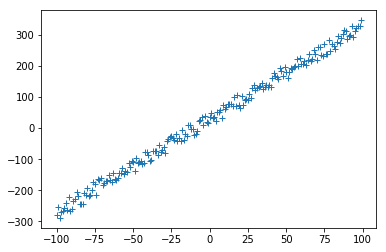

In [163]:
plt.plot(x.numpy(), y.numpy(), '+')

In [164]:
class LinearRegressionModel(nn.Module):

    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        # You just have to define the forward function, and the backward function (where gradients are computed) 
        # is automatically defined for you using autograd. You can use any of the Tensor operations in the forward function.
        out = self.linear(x)
        return out

In [165]:
model = LinearRegressionModel()
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [166]:
# The learnable parameters of a model are returned by net.parameters()
list(model.parameters())

[Parameter containing:
 tensor([[-0.7729]]), Parameter containing:
 tensor([-0.1468])]

In [167]:
model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)
                      
for epoch in range(50):
    # zero the parameter gradients from previous epoch
    optimizer.zero_grad()
    
    # forward + backward + optimize
    output = model(x.view(-1, 1))
    loss = criterion(output, y.view(-1, 1))
    loss.backward()    # accumulate gradients through backprop
    optimizer.step()   # Does the update
    if(epoch % 10 == 0):
        print('epoch {}, loss {}, {}.x + {}, gradient w {} b {}'.format(
            epoch, 
            loss.data.item(), 
            model.linear.weight.item(), 
            model.linear.bias.item(), 
            model.linear.weight.grad.item(), 
            model.linear.bias.grad.item()
        ))
    
list(model.parameters())

epoch 0, loss 47850.81640625, 1.7496973276138306.x + 0.6115589737892151, gradient w -24969.771484375 b -56.29227066040039
epoch 10, loss 1087.8780517578125, 2.997986316680908.x + 0.6713443994522095, gradient w -0.4314002990722656 b -59.9186897277832
epoch 20, loss 1084.2943115234375, 2.998016357421875.x + 0.7311972379684448, gradient w -0.00918087363243103 b -59.79899215698242
epoch 30, loss 1080.724853515625, 2.9980251789093018.x + 0.7909306287765503, gradient w -0.008146584033966064 b -59.679534912109375
epoch 40, loss 1077.170654296875, 2.9980342388153076.x + 0.850544810295105, gradient w -0.008880198001861572 b -59.56029510498047


[Parameter containing:
 tensor([[ 2.9980]]), Parameter containing:
 tensor([ 0.9041])]

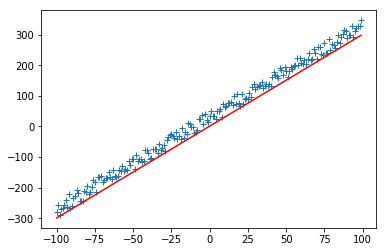

In [169]:
plt.plot(x.numpy(), y.numpy(), '+', x.numpy(), model(x.view(-1, 1)).view(-1).detach().numpy(), 'r')

## Let's try a square poly

In [192]:
x = torch.arange(0, 10, 0.001)
y = torch.pow(x, 2) + 10*torch.rand(10000)

In [193]:
def make_features(x):
    """Builds features i.e. a matrix with columns [x, x^2]."""
    x = x.unsqueeze(1)
    return torch.cat([x ** i for i in range(1, 3)], 1)

First, cheat by building a x^2 feature to input in the model

In [173]:
make_features(x)

tensor([[  0.0000,   0.0000],
        [  0.0010,   0.0000],
        [  0.0020,   0.0000],
        ...,
        [  9.9970,  99.9400],
        [  9.9980,  99.9600],
        [  9.9990,  99.9800]])

In [174]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(2, 1)

    def forward(self, x):
        x = self.fc(x)
        return x

In [175]:
net = Net()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001)
                      
for epoch in range(10001):
    # zero the parameter gradients from previous epoch
    optimizer.zero_grad()
    
    # forward + backward + optimize
    output = net(make_features(x))
    loss = criterion(output, y.view(-1, 1))
    loss.backward()    # accumulate gradients through backprop
    optimizer.step()   # Does the update
    if(epoch % 1000 == 0):
        print('epoch {}, loss {}'.format(epoch, loss.data.item()))
    
list(net.parameters())

epoch 0, loss 1204.5260009765625
epoch 1000, loss 15.832525253295898
epoch 2000, loss 12.276150703430176
epoch 3000, loss 10.871932983398438
epoch 4000, loss 10.294178009033203
epoch 5000, loss 10.034710884094238
epoch 6000, loss 9.898603439331055
epoch 7000, loss 9.811182022094727
epoch 8000, loss 9.743734359741211
epoch 9000, loss 9.685248374938965
epoch 10000, loss 9.631342887878418


[Parameter containing:
 tensor([[ 1.4339,  0.8794]]), Parameter containing:
 tensor([ 1.4862])]

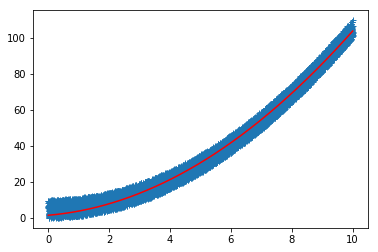

In [176]:
plt.plot(x.numpy(), y.numpy(), '+', x.numpy(), net(make_features(x)).view(-1).detach().numpy(), 'r')

Now try only with one input and multilayer net

In [194]:
class MultiNet(nn.Module):

    def __init__(self):
        super(MultiNet, self).__init__()
        self.fc1 = nn.Linear(1, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [195]:
mnet = MultiNet()
criterion = nn.MSELoss()
optimizer = optim.SGD(mnet.parameters(), lr=0.0001)
                      
for epoch in range(10001):
    # zero the parameter gradients from previous epoch
    optimizer.zero_grad()
    
    # forward + backward + optimize
    output = mnet(x.view(-1, 1))
    loss = criterion(output, y.view(-1, 1))
    loss.backward()    # accumulate gradients through backprop
    optimizer.step()   # Does the update
    if(epoch % 1000 == 0):
        print('epoch {}, loss {}'.format(epoch, loss.data.item()))
    
#list(mnet.parameters())

epoch 0, loss 2379.767578125
epoch 1000, loss 31.337474822998047
epoch 2000, loss 12.932994842529297
epoch 3000, loss 10.12301254272461
epoch 4000, loss 9.225488662719727
epoch 5000, loss 8.827387809753418
epoch 6000, loss 8.633849143981934
epoch 7000, loss 8.531479835510254
epoch 8000, loss 8.471953392028809
epoch 9000, loss 8.440422058105469
epoch 10000, loss 8.419716835021973


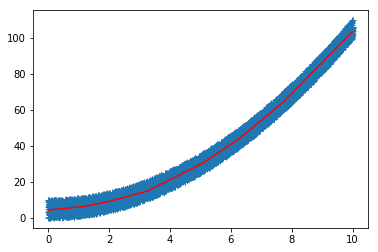

In [196]:
plt.plot(x.numpy(), y.numpy(), '+', x.numpy(), mnet(x.view(-1, 1)).view(-1).detach().numpy(), 'r')

Both converge to the same loss, though the feature one converges faster

## Let's try a sine function

In [221]:
x = torch.arange(0, 10, 0.01)
y = torch.sin(x) + 0.5*torch.rand(1000)

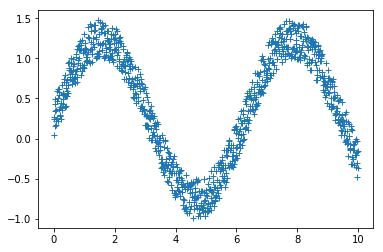

In [222]:
plt.plot(x.numpy(), y.numpy(), '+')

In [228]:
class SinNet(nn.Module):

    def __init__(self):
        super(SinNet, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [229]:
snet = SinNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(snet.parameters(), lr=0.0001)
                      
for epoch in range(10001):
    # zero the parameter gradients from previous epoch
    optimizer.zero_grad()
    
    # forward + backward + optimize
    output = snet(x.view(-1, 1))
    loss = criterion(output, y.view(-1, 1))
    loss.backward()    # accumulate gradients through backprop
    optimizer.step()   # Does the update
    if(epoch % 1000 == 0):
        print('epoch {}, loss {}'.format(epoch, loss.data.item()))

epoch 0, loss 1.0638618469238281
epoch 1000, loss 0.25263503193855286
epoch 2000, loss 0.19504967331886292
epoch 3000, loss 0.184067964553833
epoch 4000, loss 0.15169085562229156
epoch 5000, loss 0.09749866276979446
epoch 6000, loss 0.049539268016815186
epoch 7000, loss 0.027796655893325806
epoch 8000, loss 0.023776281625032425
epoch 9000, loss 0.023530486971139908
epoch 10000, loss 0.023489831015467644


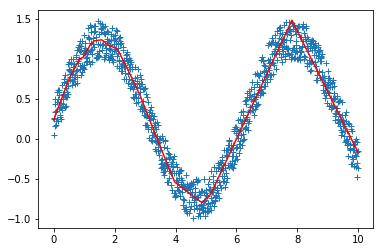

In [230]:
plt.plot(x.numpy(), y.numpy(), '+', x.numpy(), snet(x.view(-1, 1)).view(-1).detach().numpy(), 'r')